In [3]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
#import warnings
#warnings.filterwarnings("ignore") 

In [4]:
df = pd.read_csv('loans.csv', index_col = 'client_id')

In [5]:
# Having general idea about the size of dataframe; either len or shape
df.shape
print(df.columns)

Index(['loan_type', 'loan_amount', 'repaid', 'loan_id', 'loan_start',
       'loan_end', 'rate'],
      dtype='object')


In [6]:
# Exploring more on columns name/type in the dataframe
df.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB
Index(['loan_type', 'loan_amount', 'repaid', 'loan_id', 'loan_start',
       'loan_end', 'rate'],
      dtype='object')


In [7]:
# 1st-task: though the loan-id and repaid-id should first converted from integer to objects, 
#as we are not working in this example with them, we drop them together from dataframe:

df=df.drop(columns=['loan_id', 'repaid'])


In [8]:
# check our columns name
print(df.columns)

Index(['loan_type', 'loan_amount', 'loan_start', 'loan_end', 'rate'], dtype='object')


In [9]:
#(Preprocessing):First step: Checking Missing data(No missing data handling needed here)
df.isnull().sum()

loan_type      0
loan_amount    0
loan_start     0
loan_end       0
rate           0
dtype: int64

In [10]:
# 2nd-Task: a-Check with columns is categorical data(loan_type is categorical data)
print(df.head(10))
print("show categorical values:" , df['loan_type'].unique())

          loan_type  loan_amount  loan_start    loan_end  rate
client_id                                                     
46109          home        13672  2002-04-16  2003-12-20  2.15
46109        credit         9794  2003-10-21  2005-07-17  1.25
46109          home        12734  2006-02-01  2007-07-05  0.68
46109          cash        12518  2010-12-08  2013-05-05  1.24
46109        credit        14049  2010-07-07  2012-05-21  3.13
46109          home         6935  2006-09-17  2008-11-26  1.94
46109          cash         6177  2007-03-12  2009-04-26  9.48
46109          home        12656  2006-05-26  2007-10-15  4.14
46109          home        11062  2012-09-12  2014-03-14  5.48
46109         other         4050  2003-12-06  2005-08-19  4.26
show categorical values: ['home' 'credit' 'cash' 'other']


In [11]:

df['loan_type'] = df['loan_type'].astype(str)  # Ensure it's a string column
print(df['loan_type'])

#b-One Hot Encoding on loan_type:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False gives a dense matrix (array)

# Fit and transform the 'loan_type' column to get one-hot encoded values
encoded_loan_type = encoder.fit_transform(df[['loan_type']])

# Create a DataFrame with the one-hot encoded data
encoded_df = pd.DataFrame(encoded_loan_type, columns=encoder.categories_[0])

# Reset the index of both DataFrames (if needed)
df = df.reset_index(drop=True)  # Reset index to avoid reindexing issues
encoded_df = encoded_df.reset_index(drop=True)  # Ensure encoded_df has the same index

# Concatenate the encoded columns with the original DataFrame
# Here, we'll concatenate the new columns but keep 'loan_type' for now
df = pd.concat([df, encoded_df], axis=1)

# Drop the original 'loan_type' column if you no longer need it
df = df.drop(columns=['loan_type'])

# Display the resulting DataFrame
print(df)

client_id
46109      home
46109    credit
46109      home
46109      cash
46109    credit
          ...  
26945     other
26945    credit
26945     other
26945      home
26945      home
Name: loan_type, Length: 443, dtype: object
     loan_amount  loan_start    loan_end  rate  cash  credit  home  other
0          13672  2002-04-16  2003-12-20  2.15   0.0     0.0   1.0    0.0
1           9794  2003-10-21  2005-07-17  1.25   0.0     1.0   0.0    0.0
2          12734  2006-02-01  2007-07-05  0.68   0.0     0.0   1.0    0.0
3          12518  2010-12-08  2013-05-05  1.24   1.0     0.0   0.0    0.0
4          14049  2010-07-07  2012-05-21  3.13   0.0     1.0   0.0    0.0
..           ...         ...         ...   ...   ...     ...   ...    ...
438        12963  2001-11-26  2004-06-11  2.46   0.0     0.0   0.0    1.0
439         1728  2004-01-27  2005-06-21  5.27   0.0     1.0   0.0    0.0
440         9329  2001-12-17  2004-07-22  5.65   0.0     0.0   0.0    1.0
441         4197  2003-10-16  

In [12]:
#converting data string to date format
df['loan_start'] = pd.to_datetime(df['loan_start'], format = '%Y-%m-%d')
df['loan_end'] = pd.to_datetime(df['loan_end'], format = '%Y-%m-%d')


In [13]:
# 3rd Task: Extracting more data out of dates
# a)Calculate the duration of the loan

df['loan_duration'] = (df['loan_end'] - df['loan_start'])  # This will give you the difference in days
print(df.loan_duration)

# b) Extract the day from the 'loan_start' and 'loan_end' column and store them in a new 'start_day'and 'end_day' columns
df['start_day'] = df['loan_start'].dt.day
df['end_day'] = df['loan_end'].dt.day

# c) Extract the month from the 'loan_start' and 'loan_end' column and store them in a new 'start_month'and 'end_month' columns
df['start_month'] = df['loan_start'].dt.month
df['end_month'] = df['loan_end'].dt.month

# c) Extract the year from the 'loan_start' and 'loan_end' column and store them in a new 'start_year'and 'end_year' columns
df['start_year'] = df['loan_start'].dt.year
df['end_year'] = df['loan_end'].dt.year

print(df)

0     613 days
1     635 days
2     519 days
3     879 days
4     684 days
        ...   
438   928 days
439   511 days
440   948 days
441   633 days
442   638 days
Name: loan_duration, Length: 443, dtype: timedelta64[ns]
     loan_amount loan_start   loan_end  rate  cash  credit  home  other  \
0          13672 2002-04-16 2003-12-20  2.15   0.0     0.0   1.0    0.0   
1           9794 2003-10-21 2005-07-17  1.25   0.0     1.0   0.0    0.0   
2          12734 2006-02-01 2007-07-05  0.68   0.0     0.0   1.0    0.0   
3          12518 2010-12-08 2013-05-05  1.24   1.0     0.0   0.0    0.0   
4          14049 2010-07-07 2012-05-21  3.13   0.0     1.0   0.0    0.0   
..           ...        ...        ...   ...   ...     ...   ...    ...   
438        12963 2001-11-26 2004-06-11  2.46   0.0     0.0   0.0    1.0   
439         1728 2004-01-27 2005-06-21  5.27   0.0     1.0   0.0    0.0   
440         9329 2001-12-17 2004-07-22  5.65   0.0     0.0   0.0    1.0   
441         4197 2003-10-16 

0      False
1      False
2      False
3      False
4      False
       ...  
438    False
439    False
440    False
441    False
442    False
Name: is_outlier, Length: 443, dtype: bool
Empty DataFrame
Columns: [loan_amount, loan_start, loan_end, rate, cash, credit, home, other, zscore, is_outlier]
Index: []


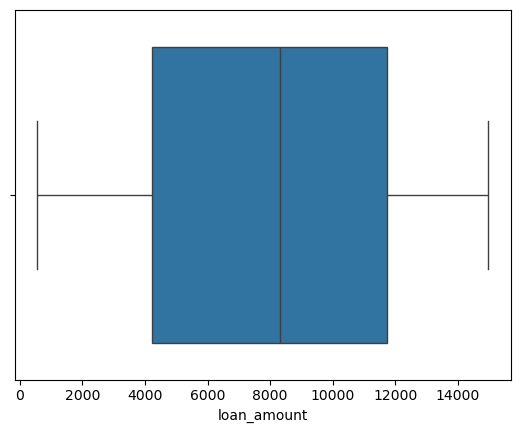

In [229]:
#4th Task: ouliers detection with z-score method in loan_amount
import pandas as pd
from scipy.stats import zscore

df['zscore'] = zscore(df['loan_amount'])
df['is_outlier'] = (df['zscore'] > 3) | (df['zscore'] <-3)
print(df.is_outlier)
# Filter and show only the rows where 'is_outlier' is True
outliers = df.loc[df['is_outlier'] == True]
print(outliers)

#that means there is no outliers in loan_amount.
# Display the outliers of loan_amount with box plot

import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot to visualise outliers
sns.boxplot(x=df['loan_amount'])
plt.show()

Q1 (25th percentile): 1.22
Q3 (75th percentile): 4.75
IQR (Interquartile Range): 3.5300000000000002
Lower Bound: -4.075
Upper Bound: 10.045
Empty DataFrame
Columns: [loan_amount, loan_start, loan_end, rate, cash, credit, home, other, loan_duration, start_day, end_day, start_month, end_month, start_year, end_year, SQRT_RATE, sqrt_rate, Log Rate]
Index: []


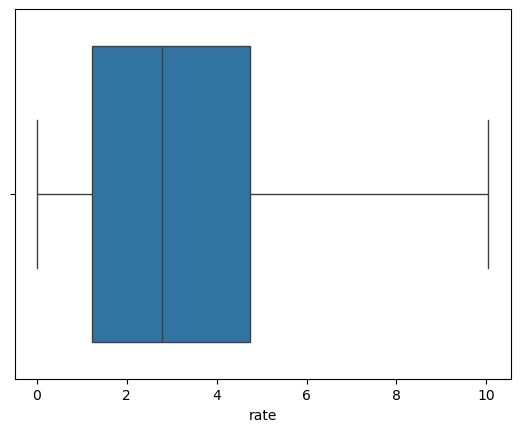

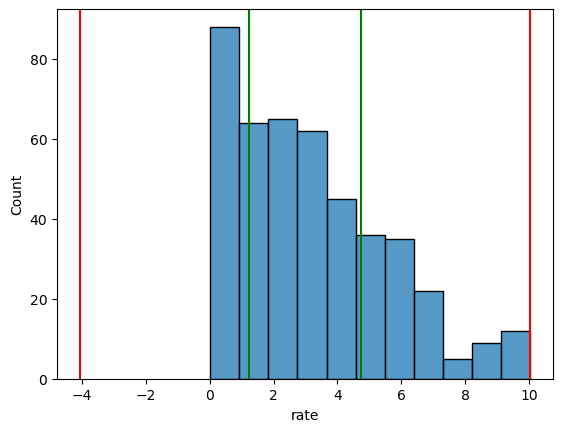

In [37]:
# 5th Task: ouliers detection with box plot or IQR method for rate

Q1 = df['rate'].quantile(0.25)
Q3 = df['rate'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Debug: Print Q1, Q3, and IQR
print("Q1 (25th percentile):", Q1)
print("Q3 (75th percentile):", Q3)
print("IQR (Interquartile Range):", IQR)

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Debug: Print the bounds
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


# Identify the outliers by checking values outside the bounds
outliers = df[(df['rate'] < lower_bound) | (df['rate'] > upper_bound)]
# Display the outliers
print(outliers)


#debug the outliers by boxplot
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot to visualise outliers
sns.boxplot(x=df['rate'])
plt.show()
sns.histplot(df.rate)
plt.axvline(upper_bound, color='r')
plt.axvline(lower_bound, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()


In [15]:

# 6th Task: ouliers replacement with box plot or IQR method for rate
# Save a copy of the original 'rate' column to check before and after the modification
original_rate = df['rate'].copy()
# Replace outliers with the upper or lower bound for the 'rate' column
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:  # Only apply to numeric columns
        for index, row in df.iterrows():
            if row[column] < lower_bound:
                df.at[index, column] = lower_bound
            elif row[column] > upper_bound:
                df.at[index, column] = upper_bound
outliers_replaced = (original_rate < lower_bound) | (original_rate > upper_bound)
num_replacements = outliers_replaced.sum()

# Display the rows where outliers were replaced
replaced_rows = df[outliers_replaced]
print(replaced_rows)

     loan_amount loan_start   loan_end    rate  cash  credit  home  other  \
41        10.045 2005-11-10 2008-03-16  10.045   0.0     1.0   0.0    0.0   
195       10.045 2003-02-02 2005-05-08  10.045   0.0     0.0   0.0    1.0   
421       10.045 2009-03-14 2011-03-21  10.045   0.0     0.0   1.0    0.0   

    loan_duration  start_day  end_day  start_month  end_month  start_year  \
41       857 days         10       16           11          3        2005   
195      826 days          2        8            2          5        2003   
421      737 days         14       21            3          3        2009   

     end_year  
41       2008  
195      2005  
421      2011  


/var/folders/pn/rwgq09r15md5zh77f6xvd5ch0000gn/T/ipykernel_12780/822620485.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.045' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[index, column] = upper_bound


Skewness 0.805859934531388
Skewness of the SQRT 0.02309226974463578

Kurtosis 0.05504910825429832
Kurtosis of the SQRT -0.6950723674356434
Skewness 0.805859934531388
Skewness of the SQRT 0.02309226974463578
Skewnss of the LOG transformed -1.601890661251967

Kurtosis 0.05504910825429832
Kurtosis of the SQRT -0.6950723674356434
Kurtosis of the LOG transformed 4.173447905626535


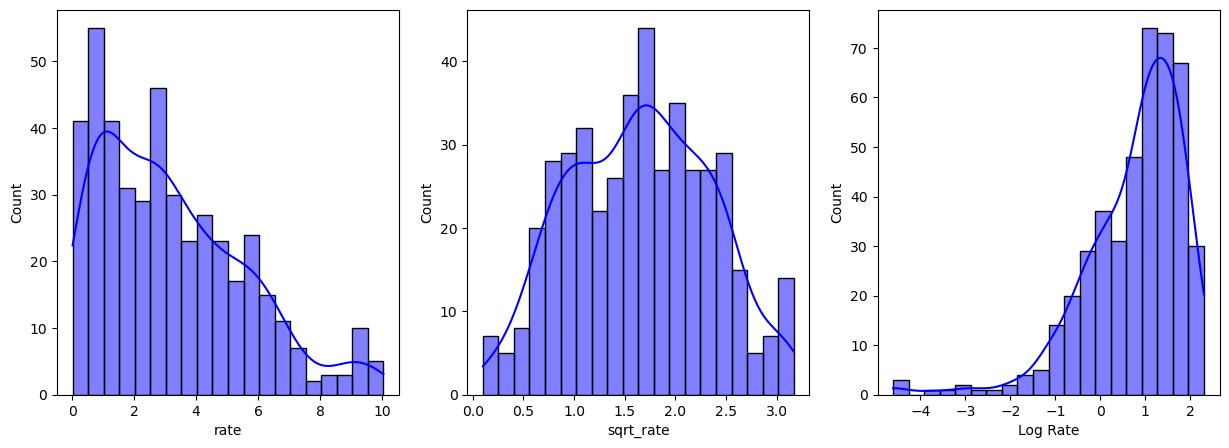

,loan_amount,loan_start,loan_end,rate,cash,credit,home,other,loan_duration,start_day,end_day,start_month,end_month,start_year,end_year,SQRT_RATE,sqrt_rate,Log Rate
0,10.045,2002-04-16,2003-12-20,2.15,0.0,0.0,1.0,0.0,613 days,16,20,4,12,2002,2003,1.466288,1.466288,0.765468
1,10.045,2003-10-21,2005-07-17,1.25,0.0,1.0,0.0,0.0,635 days,21,17,10,7,2003,2005,1.118034,1.118034,0.223144
2,10.045,2006-02-01,2007-07-05,0.68,0.0,0.0,1.0,0.0,519 days,1,5,2,7,2006,2007,0.824621,0.824621,-0.385662
3,10.045,2010-12-08,2013-05-05,1.24,1.0,0.0,0.0,0.0,879 days,8,5,12,5,2010,2013,1.113553,1.113553,0.215111
4,10.045,2010-07-07,2012-05-21,3.13,0.0,1.0,0.0,0.0,684 days,7,21,7,5,2010,2012,1.769181,1.769181,1.141033


In [34]:
# Normalizing the distribution of rate by SQRT and Log of rate; which one is better
# considering SQRT looks more like normal distribution, we use that to normalise dat
df['sqrt_rate'] = np.sqrt(df['rate'])
print("Skewness {}".format(df.rate.skew()))
print('Skewness of the SQRT {}'.format(df.SQRT_RATE.skew()))
print('')
print("Kurtosis {}".format(df.rate.kurt()))
print("Kurtosis of the SQRT {}".format(df.SQRT_RATE.kurt()))
df['Log Rate'] = np.log(df['rate'])
print("Skewness {}".format(df.rate.skew()))
print('Skewness of the SQRT {}'.format(df.SQRT_RATE.skew()))
print("Skewnss of the LOG transformed {}".format(df['Log Rate'].skew()))
print('')
print("Kurtosis {}".format(df.rate.kurt()))
print("Kurtosis of the SQRT {}".format(df.SQRT_RATE.kurt()))
print("Kurtosis of the LOG transformed {}".format(df['Log Rate'].kurt()))
df.head()

import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,3, figsize=(15,5))
sns.histplot(df['rate'], kde=True, color='blue', bins=20, ax=axes[0])
sns.histplot(df['sqrt_rate'], kde=True, color='blue', bins=20 , ax=axes[1])
sns.histplot(df['Log Rate'], kde=True, color='blue', bins=20 , ax=axes[2])

plt.show()

df.head()